<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite-Difference Method - Second Derivative</div>
        </div>
    </div>
</div>

#### This exercise covers the following aspects:
* Initializing a Gaussian test function
* Calculation of numerical second derivative with 3-point operator
* Accuracy improvement of numerical derivative with 5-point operator

**Note:** 
* Loop boundaries changed for 5-point operator, May 2020

In [1]:
# Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

We initialize a Gaussian function

\begin{equation} 
f(x)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(x-x_0)^2}{2a}}
\end{equation} 

Note that this specific definition is a $\delta-$generating function. This means that $\int{f(x) dx}=1$ and in the limit $a\rightarrow0$ the function f(x) converges to a $\delta-$function.  

In [2]:
# Initialization 
xmax=10.0       # physical domain (m)
nx=100          # number of space samples
a=.25           # exponent of Gaussian function    
dx=xmax/(nx-1)  # Grid spacing dx (m)
x0 = xmax/2     # Center of Gaussian function x0 (m)

x=np.linspace(0,xmax,nx)   # defining space variable

# Initialization of Gaussian function           
f=(1./sqrt(2*pi*a))*np.exp(-(((x-x0)**2)/(2*a)))


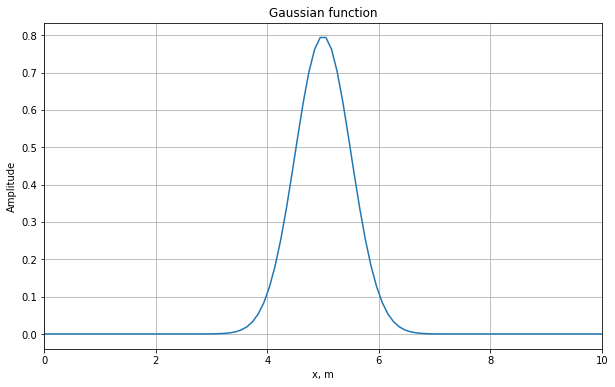

In [3]:
# Plotting of gaussian
plt.figure(figsize=(10,6))
plt.plot(x, f)
plt.title('Gaussian function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

Now let us calculate the second derivative using the finite-difference operator with three points

\begin{equation} 
f^{\prime\prime}_{num}(x)=\dfrac{f(x+dx)-2 f(x)+f(x-dx)}{dx^2}
\end{equation} 

and compare it with the analytical solution
\begin{equation} 
f^{\prime\prime}(x)= \dfrac{1}{\sqrt{2\pi a}} ( \dfrac{(x-x_0)^2}{a^2}- \dfrac{1}{a} ) \ e^{-\dfrac{(x-x_0)^2}{2a}}
\end{equation} 

In [4]:
# Second derivative with three-point operator

# Initiation of numerical and analytical derivatives 
nder3=np.zeros(nx)          # numerical derivative
ader=np.zeros(nx)          # analytical derivative

# Numerical second derivative of the given function 
for i in range (1, nx-1):
    nder3[i]=(f[i+1] - 2*f[i] + f[i-1])/(dx**2)

# Analytical second derivative of the Gaissian function
ader=1./sqrt(2*pi*a)*((x-x0)**2/a**2 -1/a)*np.exp(-1/(2*a)*(x-x0)**2)
# Exclude boundaries
ader[0]=0.
ader[nx-1]=0.

# Calculate rms error of numerical derivative
rms = np.sqrt(np.mean((nder3-ader)**2))


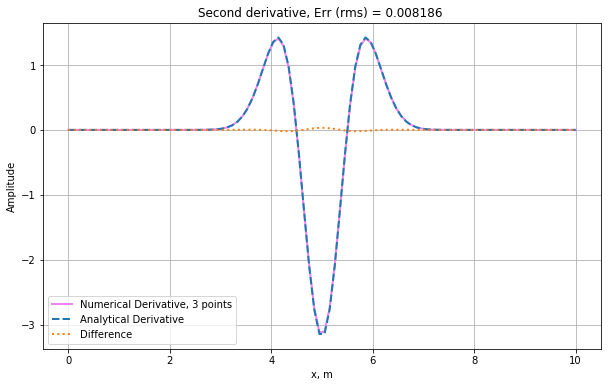

In [5]:
# Plotting 
plt.figure(figsize=(10,6))
plt.plot (x, nder3,label="Numerical Derivative, 3 points", lw=2, color="violet")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="--")
plt.plot (x, nder3-ader, label="Difference", lw=2, ls=":")
plt.title("Second derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In the cell below calculation of the first derivative with four points is provided with the following weights:

\begin{equation}
f^{\prime\prime}(x)=\dfrac{-\dfrac{1}{12}f(x-2dx)+\dfrac{4}{3}f(x-dx)-\dfrac{5}{2}f(x) +\dfrac{4}{3}f(x+dx)-\dfrac{1}{12}f(x+2dx)}{dx^2}
\end{equation}

In [6]:
# First derivative with four points

# Initialisation of derivative
nder5=np.zeros(nx) 

# Calculation of 2nd derivative  
for i in range (2, nx-2):
    nder5[i] = (-1./12 * f[i - 2] + 4./3  * f[i - 1] - 5./2 * f[i] \
                       +4./3  * f[i + 1] - 1./12  * f[i + 2]) / dx ** 2
    
# Exclude boundaries
ader[1]=0.
ader[nx-2]=0.
    
# Calculate rms error of numerical derivative
rms=rms*0
rms = np.sqrt(np.mean((nder5-ader)**2))

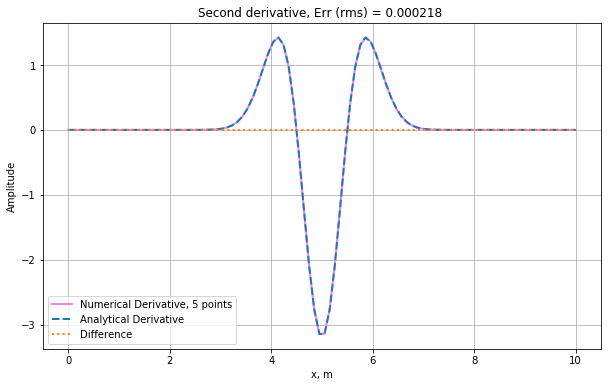

In [7]:
# Plotting 
plt.figure(figsize=(10,6))
plt.plot (x, nder5,label="Numerical Derivative, 5 points", lw=2, color="violet")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="--")
plt.plot (x, nder5-ader, label="Difference", lw=2, ls=":")
plt.title("Second derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### Conclusions

* 3-point finite-difference approximations can provide  estimates of the 2nd derivative of a function
* We can increase the accuracy of the approximation by using further functional values further
* A 5-point operator leads to substantially more accurate results